In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.drop(columns=["User ID","Gender"])

In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [5]:
x=df.drop(columns=["Purchased"])
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y=df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting SVM to the Training set**

In [16]:
from sklearn.svm import SVC
model = SVC()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:

param = {
        'C': [1,5,10,20,30],
        "gamma":[1,2,3,4,5,10,20,30],
        'kernel': ['rbf','linear']
    }

In [20]:
grid=GridSearchCV(SVC(),param,cv=10)

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 30],
                         'gamma': [1, 2, 3, 4, 5, 10, 20, 30],
                         'kernel': ['rbf', 'linear']})

In [22]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004017,0.005403,0.001600,0.003200,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.964286,0.821429,...,0.892857,0.892857,0.928571,0.964286,0.892857,0.857143,0.928571,0.900000,0.044607,3
1,0.000000,0.000000,0.000800,0.002401,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.857143,0.821429,...,0.928571,0.857143,0.892857,0.964286,0.785714,0.785714,0.821429,0.846429,0.063987,71
2,0.003125,0.006251,0.001563,0.004688,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.964286,0.821429,...,0.892857,0.892857,0.928571,0.964286,0.928571,0.857143,0.857143,0.896429,0.046429,6
3,0.001563,0.004689,0.001565,0.004695,1,2,linear,"{'C': 1, 'gamma': 2, 'kernel': 'linear'}",0.857143,0.821429,...,0.928571,0.857143,0.892857,0.964286,0.785714,0.785714,0.821429,0.846429,0.063987,71
4,0.000000,0.000000,0.003125,0.006250,1,3,rbf,"{'C': 1, 'gamma': 3, 'kernel': 'rbf'}",0.964286,0.821429,...,0.892857,0.892857,0.928571,0.964286,0.928571,0.857143,0.857143,0.900000,0.044607,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.004888,0.003917,0.000100,0.000301,30,10,linear,"{'C': 30, 'gamma': 10, 'kernel': 'linear'}",0.857143,0.821429,...,0.928571,0.857143,0.928571,0.964286,0.785714,0.785714,0.821429,0.853571,0.062780,36
76,0.005663,0.005249,0.000800,0.002400,30,20,rbf,"{'C': 30, 'gamma': 20, 'kernel': 'rbf'}",0.857143,0.785714,...,0.821429,0.821429,0.892857,0.964286,0.928571,0.785714,0.821429,0.853571,0.056356,36
77,0.004407,0.003774,0.000000,0.000000,30,20,linear,"{'C': 30, 'gamma': 20, 'kernel': 'linear'}",0.857143,0.821429,...,0.928571,0.857143,0.928571,0.964286,0.785714,0.785714,0.821429,0.853571,0.062780,36
78,0.004690,0.007164,0.001562,0.004687,30,30,rbf,"{'C': 30, 'gamma': 30, 'kernel': 'rbf'}",0.821429,0.821429,...,0.821429,0.785714,0.892857,0.928571,0.892857,0.750000,0.821429,0.835714,0.051010,80


In [23]:
grid.best_params_

{'C': 10, 'gamma': 3, 'kernel': 'rbf'}

In [24]:
grid.best_score_

0.9035714285714285

In [27]:
model = SVC(C= 10, gamma= 3, kernel= 'rbf')

In [28]:
model.fit(X_train, y_train)

SVC(C=10, gamma=3)

**Predicting the Test set results**

In [33]:
model.score(X_test, y_test)

0.875

**Making the Confusion Matrix**

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_y_pred = model.predict(X_train)
am = confusion_matrix(y_train, train_y_pred)
print(cm)
print(am)

[[62  6]
 [ 9 43]]
[[180   9]
 [  5  86]]


**Visualising the Training set results**

Text(58.222222222222214, 0.5, 'Truth')

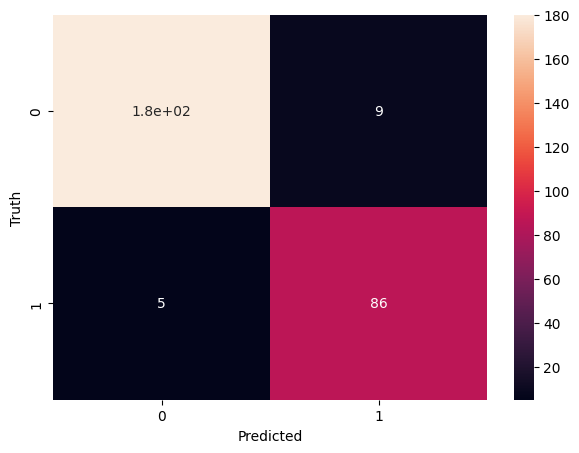

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(am, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(58.222222222222214, 0.5, 'Truth')

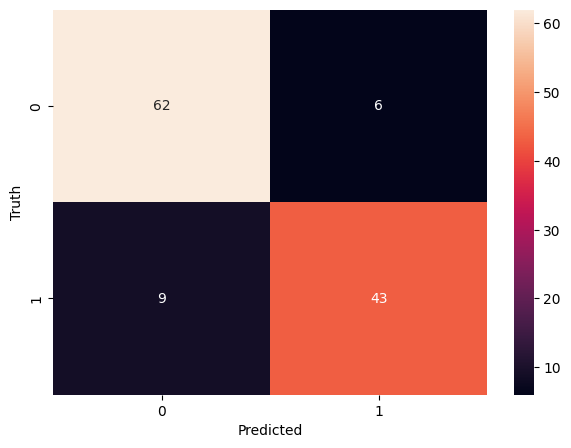

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')